# сверточная нейронная сеть по классификации лошадей и людей по фотографии

Данная нейросеть была реализована в ходе прохождении курса "Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning" от deeplearning.ai

Для обучения будет использовать сгенерированные изображения лошадей и людей.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-12-14 03:48:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   181MB/s    in 0.8s    

2020-12-14 03:48:35 (181 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-12-14 03:48:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-12-14 03:48:36 (81.6 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



Разархивируем данные

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Распределение данных производится по их расположению в подкаталогах.

In [4]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Сохраним имена файлов и узнаем размеры данных

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print('Тренировочные изображения с лошадьми:', len(os.listdir(train_horse_dir)))
train_human_names = os.listdir(train_human_dir)
print('Тренировочные изображения с людьми:', len(os.listdir(train_human_dir)))
validation_horse_hames = os.listdir(validation_horse_dir)
print('Проверочные изображения с лошадьми:', len(os.listdir(validation_horse_dir)))
validation_human_names = os.listdir(validation_human_dir)
print('Проверочные изображения с людьми:', len(os.listdir(validation_human_dir)))

Тренировочные изображения с лошадьми: 500
Тренировочные изображения с людьми: 527
Проверочные изображения с лошадьми: 128
Проверочные изображения с людьми: 128


Для лучшего представления данных отрисуем несколько изображений

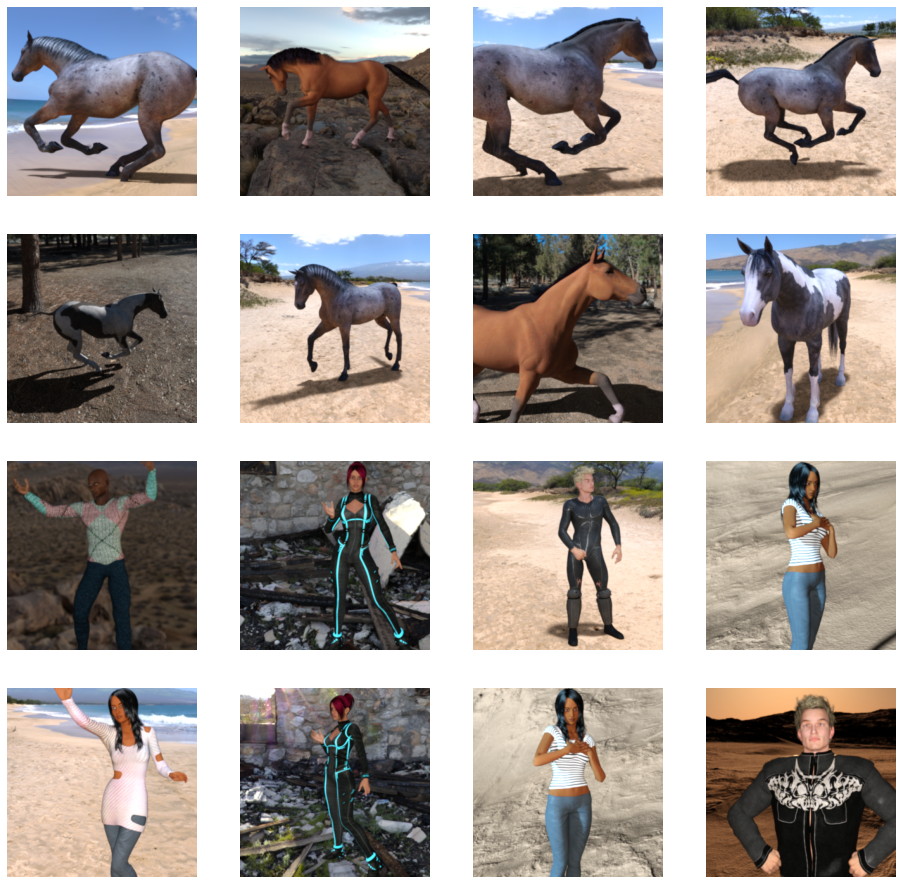

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


pic_index = 0

# Отрисовка 4х4 картинки
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [42]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # Свёртка 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Свёртка 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Свёртка 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Свёртка 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Свёртка 5
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten сглаживает результаты для DNN
    tf.keras.layers.Flatten(),
    # Скрытый слой 1 с 512 нейронами
    tf.keras.layers.Dense(512, activation='relu'),
    # Скрытый слой 2 с 128 нейронами
    tf.keras.layers.Dense(128, activation='relu'),
    # 1 выходной нейрон с сигмойдой, где 0 лошадь и 1 человек
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Посмотрим на выходы слоёв

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

Для обучения будем использовать бинарную классификацию. Метрикой будет точность определения. Функция активации - сигмоид и оптимизатор среднеквадратичного отклонения со скоростью обучения 0,001

In [44]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

У нас будет один генератор для обучающих изображений и один для проверочных изображений. Генераторы будут генерировать пакеты изображений размером 300x300 и их бинарные метки.

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Нормализируем данные умножив на 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Обучающие данные будем подавать в 300х300 пикселей и батчами по 128
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  #меняем разрешение изображений
        batch_size=128,
        class_mode='binary') # выбрали бинарные метки

# Тренировочные данные также подаются в 300х300 но по 32 изображения в батче
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [45]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('val_accuracy')>0.90 and logs.get('accuracy')>0.90):
                print("\nТочность достагла 90%. Обучение прервано")
                self.model.stop_training = True
        
callbacks = myCallback()

In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callbacks])

Epoch 1/25
8/8 [==============================] - 7s 905ms/step - loss: 0.6979 - accuracy: 0.4883 - val_loss: 0.6765 - val_accuracy: 0.5000
Epoch 2/25
8/8 [==============================] - 7s 827ms/step - loss: 0.7785 - accuracy: 0.5973 - val_loss: 0.5906 - val_accuracy: 0.6836
Epoch 3/25
8/8 [==============================] - 7s 821ms/step - loss: 0.7311 - accuracy: 0.6696 - val_loss: 0.7133 - val_accuracy: 0.5156
Epoch 4/25
8/8 [==============================] - 8s 942ms/step - loss: 0.7261 - accuracy: 0.7831 - val_loss: 0.3392 - val_accuracy: 0.8906
Epoch 5/25
8/8 [==============================] - 7s 815ms/step - loss: 0.2735 - accuracy: 0.9277 - val_loss: 2.1944 - val_accuracy: 0.6406
Epoch 6/25
8/8 [==============================] - 7s 823ms/step - loss: 0.3407 - accuracy: 0.8665 - val_loss: 0.7224 - val_accuracy: 0.8438
Epoch 7/25
8/8 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9410
Точность достагла 90%. Обучение прервано
8/8 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


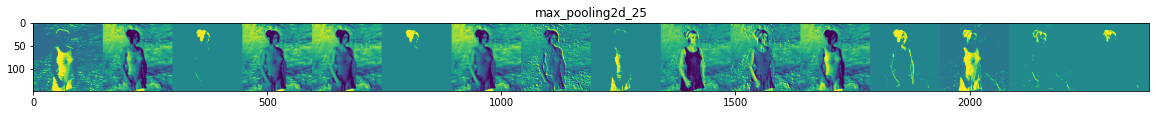

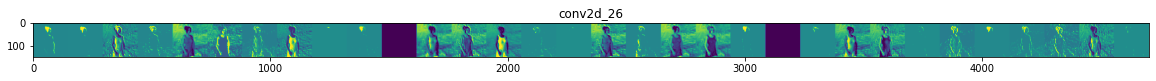

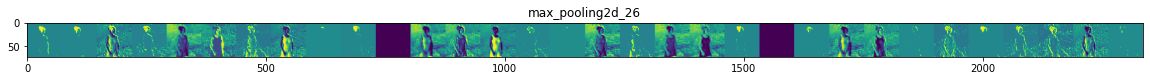

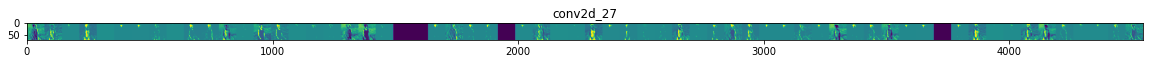

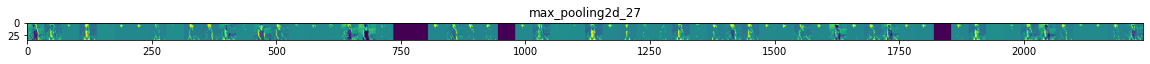

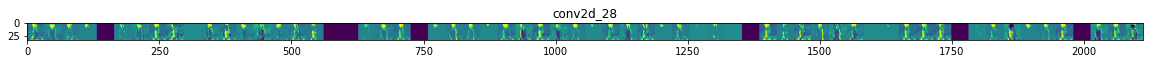

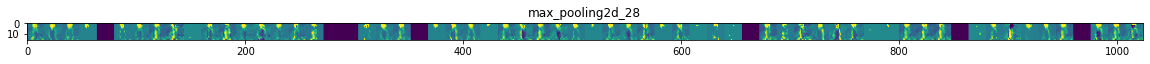

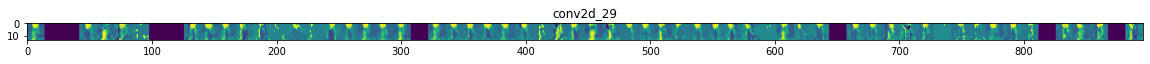

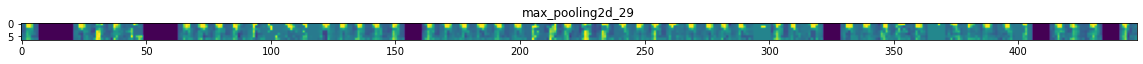

In [48]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# промежуточные представления для всех слоев в предыдущей модели
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Случайное изображение
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img)  # Numpy array  (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array (1, 150, 150, 3)

# нормализация
x /= 255

# Получим все образы путем запуска nn с случайной картинкой
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

# Визуализация сверток
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # для слоев conv2D и maxpool2D
    n_features = feature_map.shape[-1] 
    # feature map shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # Построение матрицы
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Постобработка
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Помезения фильтров в горизонтальную сетку
      display_grid[:, i * size : (i + 1) * size] = x
    # вывод
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Проверка изображений

In [49]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 121.jpg to 121.jpg
[0.]
121.jpg is a horse
